<div style="border:solid Chocolate 2px; padding: 40px">
Андрей, привет, меня зовут Станислав, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта и написаны качественные аналитические выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже ты найдешь интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

  
- скорректируй, пожалуйста, формулировку гипотезы Н1
- узнай, пожалуйста, много ли пользователей мы потеряли, отбросив старые данные
- добавь, пожалуйста, заголовок для графика и подписи осей на русском языке.
</div>
</div>






<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
    Спасибо за ссылки. 
</div>


# Приложение продажи продуктов. Воронка событий и А/В тестирование. 

__Описание проекта__

Фирма по продажи продуктов онлайн проводит исследование поведения пользователей в приложении.

Необходимо изучить воронку событий в приложении.

Провести А/В тестирования старого и нового дизайна.

Представлены данные о событиях, совершаемых пользователями, с разделением на группы пользователей.  


__Описание данных__

Каждая запись в логе — это действие пользователя, или событие. 

    •	EventName — название события;
    •	DeviceIDHash — уникальный идентификатор пользователя;
    •	EventTimestamp — время события;
    •	ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Здорово, что выделено содержание, описана цель и данные. 👍
    
Еще можно добавить заголовок, который будет отражать основную суть проекта.
</div>


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
from statsmodels.stats.proportion import proportions_ztest
from plotly import graph_objects as go

# Шаг 1. Озор данных

In [177]:
try: df = pd.read_csv(r'/datasets/logs_exp.csv', sep = '\t')
except: df = pd.read_csv('logs_exp.csv', sep = '\t')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [179]:
df.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Название событий в строковым типе. Дата события, ИД пользователя и номер эксперимента в целочисленном формате.  

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
      
Отличный предварительный анализ 👍
</div>


# Шаг 2. Подготовка данные

In [180]:
df = df.rename(columns={'EventName': 'event_name', 
                        'DeviceIDHash':'user_id', 
                        'EventTimestamp':'event_timestamp', 
                        'ExpId':'exp_id'})

In [181]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

In [182]:
df['date'] = df['event_timestamp'].dt.round('1D') # округлить до 1 дня

In [183]:
df['exp_id'] = df['exp_id'].astype('str')

In [184]:
df.isna().sum()

event_name         0
user_id            0
event_timestamp    0
exp_id             0
date               0
dtype: int64

In [185]:
display('Количество дублей {0}, что составляет {1}% от всего объема данных'.format(
    df.duplicated(subset=['event_name', 'user_id', 'event_timestamp']).sum(), 
    round(100*df.duplicated(subset=['event_name', 'user_id', 'event_timestamp']).sum()/df['user_id'].count(), 2)
)
)

'Количество дублей 413, что составляет 0.17% от всего объема данных'

<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 
    
Для понимания того, какую часть составляют дубликаты и какой объем ты удаляешь, лучше дополнительно посчитать долю.
 </div>



In [186]:
df = df.drop_duplicates().reset_index(drop=True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  datetime64[ns]
 3   exp_id           243713 non-null  object        
 4   date             243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 9.3+ MB


Названия заголовков приведены к общеприемлемому виду.  
Пропусков нет. Дубли 413 штук (0.17% от всего объема) - удалены.   
Время событий приведено к datetime, номер эксперимента к строковому.   
Добавлена колонка с датой, округленной до дня.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Данные подготовлены верно, молодец. 👍

Молодец, что используешь метод info() для изучения данных, корректируешь типы данных, проверяешь на дубликаты и корректно переименовываешь названия столбцов.</div>




# Шаг 3. Изучение и проверка данных

In [188]:
df['event_name'].value_counts()

event_name
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: count, dtype: int64

Всего пять видов событий:
    
    Главном экран           119 205
    Экране предложения       46 825
    Экране корзины           42 731
    Экране успешной оплаты   34 313
    Руководство               1 018

Руководство ни кто не читает

In [189]:
df['user_id'].nunique()

7551

Всего 7551 уникальный пользователь

In [190]:
df_event_name_count = (
    df
    .groupby('user_id', #группировка
            as_index=False) #переиндексирует
    .agg(  #агригирующие процедуры
           event_name_count = ('event_name', 'count'), # колоичество             
        )
       
)

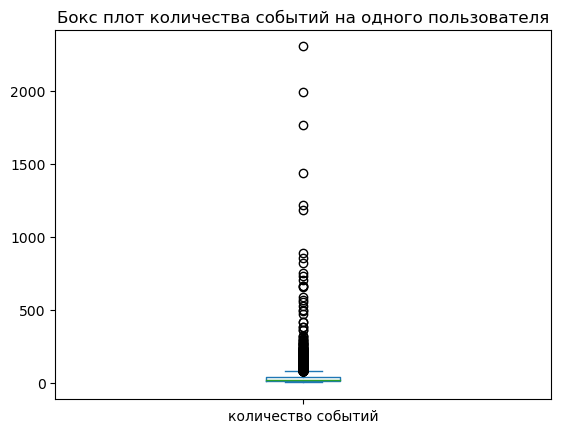

In [191]:
df_event_name_count.plot(kind='box', 
        column='event_name_count', # диаграммы ящик с усами
         )

plt.xticks([1], ['количество событий'])
plt.title('Бокс плот количества событий на одного пользователя')

plt.show()

In [192]:
df_event_name_count['event_name_count'].describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_name_count, dtype: float64

In [193]:
# выбросы
np.percentile(df_event_name_count['event_name_count'], [90, 95, 99])

array([ 64. ,  89. , 200.5])

In [194]:
df_event_name_count[df_event_name_count['event_name_count']>89].count()

user_id             372
event_name_count    372
dtype: int64

In [195]:
df_event_name_count['event_name_count'].median()

20.0

В среднем на одного пользователя приходтися около 32 событий. Но есть выбросы по количеству событий на одного пользователя. О чем свидетельствует боксплот. Максимальное число событий у одного пользователя 2307, явно что-то не так.  
95% пользователей совершили менее 89 событий, а 75% менее - 37 событий. Распределение явно смещено. Более правильной оценкой в данном случае будет медиана, которая равна 20 и сильно отличимая от среднего. Около 20 событий приходится на одного пользователя.     

<div class="alert alert-warning">
<b>Комментарий с советом или небольшим замечанием ревьюера:</b>

Когда нас просят взглянуть на среднее значение, для начала важно определить, есть ли в данных выбросы. В случае присутствия выбросов лучше использовать медиану, чем среднее, поскольку выбросы на нее не влияют. Для того, чтобы определить есть ли в данных выбросы или нет, необходимо сгруппировать по пользователям, посчитать количество событие на пользователя и по этим данным построить график box plot и посмотреть распределение или использовать метод describe(). 
 </div>


In [196]:
print('Данные за период {0} - {1}'.format(df['event_timestamp'].min(), df['event_timestamp'].max()))

Данные за период 2019-07-25 04:43:36 - 2019-08-07 21:15:17


In [197]:
gr_df = (
    df
    .groupby('date', #группировка
             as_index=False) #переиндексирует
    .agg(  #агригирующие процедуры
           event_name_count = ('event_name', 'count'), # колоичество     
                
        )#.set_index('date')
)

In [198]:
gr_df['date'] = gr_df['date'].astype('str')

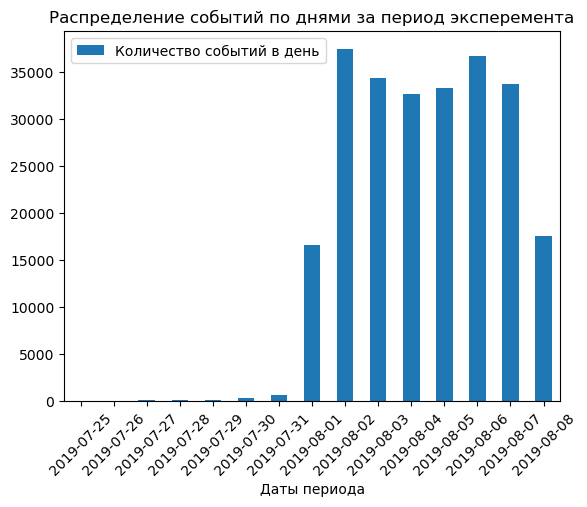

In [200]:
gr_df['date'] = gr_df['date'].astype('str')
ax1 = (
        gr_df.plot(# возвращает оси ax которые можно использовать в дальнейшем
                      kind='bar', 
                      y='event_name_count',
                      x='date',  
                      label='Количество событий в день', # название линии
                      rot = 45,
                      # xticks=list(gr_df['date'])
                    )
)
plt.title('Распределение событий по днями за период эксперемента')
plt.xlabel('Даты периода')
plt.show()

<div class="alert alert-danger">
❌<b>Комментарий с замечанием ревьюера:</b> 

Оформление графиков - очень важный скилл для аналитика, поэтому предлагаю поработать над этим.
    
У графика должно быть название, которое будет точно описывать суть графика. 
    
У графика должны быть подписаны оси на том языке, на котором сделан весь проект
    
Легенда должна нести смысловую нагрузку, просто так не следует ее размещать.
    
Удобно читаемая ориентация отметок значений на осях (к примеру даты можно расположить под углом 30-45 градусов)
</div>


In [201]:
# dola = gr_df[gr_df['date'] < '2019-08-01']['event_name_count'].sum()/gr_df['event_name_count'].sum()
dola = len(df[df['event_timestamp']<'2019-08-01'])/len(df)
print(f'Доля событий из предыдущего периода {dola:.2%}')

Доля событий из предыдущего периода 1.16%


In [202]:
user_before = len(df.user_id.unique())
df = df[df['event_timestamp'] >= '2019-08-01']
user_after = len(df.user_id.unique())

В датафрейме есть ряд записи по днями из предыдущего периода, этих записей немного.  
Их доля 1.16% от общего количества.  
Их можно удалить. 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240887 entries, 2826 to 243712
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       240887 non-null  object        
 1   user_id          240887 non-null  int64         
 2   event_timestamp  240887 non-null  datetime64[ns]
 3   exp_id           240887 non-null  object        
 4   date             240887 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 11.0+ MB


In [205]:
print(f'Количество потеряных уникальных пользоватлей {user_before-user_after}, это {(user_before-user_after)/user_before:.2%}')

Количество потеряных уникальных пользоватлей 17, это 0.23%


<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b>

Согласно заданию, также надо узнать много ли <b>пользователей</b> мы потеряли, отбросив старые данные?


In [206]:
# число уникальных пользователей по группам и количество событий по группам
gr_df = (
     df
    .groupby('exp_id', #группировка
            as_index=False) #переиндексирует
    .agg(  #агригирующие процедуры
           user_id_count = ('user_id', 'count'), # колоичество 
           user_id_nunique = ('user_id', 'nunique')
                
        )
)  

In [207]:
gr_df

,exp_id,user_id_count,user_id_nunique
0,246,79302,2484
1,247,77022,2513
2,248,84563,2537


In [208]:
users_match = len(\
                    df[df['exp_id']=='246']\
                    .merge(
                            df[df['exp_id']=='247'], 
                            on='user_id', 
                            how='inner', 
                            )\
                    .merge(
                            df[df['exp_id']=='248'], 
                            on='user_id', 
                            how='inner', 
                            )
                  )
print('Совпадающие пользователи в группах: {0}'.format(users_match))

Совпадающие пользователи в группах: 0


Во всех группах примерное одинаковое количество событий и пользователей. Пересекающихся пользователей нет.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Отличный анализ, здорово, что проверено пересечение пользователей, это важный момент.  👍
</div>


# Шаг 4. Воронка событий

In [209]:
df['event_name'].value_counts()

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: count, dtype: int64

Всего пять видов событий:
    
    На главном экране          117 328
    На экране предложения       46 333
    На экране корзины           42 303
    На экране успешной оплаты   33 918
    Руководство                  1 005

Все равно руководство ни кто не читает 

In [210]:
nunique_users = df.user_id.nunique()
count_users = df.user_id.count()
print(f'Количество уникальных пользователей^ {nunique_users}, всего событий с пользователями {count_users}')

Количество уникальных пользователей^ 7534, всего событий с пользователями 240887


In [211]:
df_v = (
    df
    .groupby('event_name', #группировка
            as_index=False) #переиндексирует
    .agg(  #агригирующие процедуры
            user_nunique = ('user_id', 'nunique'), # колоичество различны   
            # event_count = ('event_name', 'count'), # колоичество 
        ).sort_values(by='user_nunique', ascending=False)
        ).assign (
                    user_share_nunique=lambda df: round(
                                                    100*df["user_nunique"]/nunique_users, 
                                                    2
                                                    ),
                    # user_share_count=lambda df: round(
                    #                                 100*df["event_count"]/count_users, 
                    #                                 2
                    #                                 ),
                    user_share_to = lambda df:  round(100*df['user_nunique']/df['user_nunique'].shift()) 
                    )    

In [212]:
df_v

,event_name,user_nunique,user_share_nunique,user_share_to
1,MainScreenAppear,7419,98.47,NaN
2,OffersScreenAppear,4593,60.96,62.0
0,CartScreenAppear,3734,49.56,81.0
3,PaymentScreenSuccessful,3539,46.97,95.0
4,Tutorial,840,11.15,24.0


98 с половиной процентов пользователей зашли на главный экран, 
    
    61% - экран предложения или 61% от предыдущего этапа, 
    50% - экран корзины или 81% от предыдущего этапа, 
    47% - экран успешной продажи или 95% от предыдущего этапа 
    11% посмотрели руководства.

Четыре события выстраиваются в последовательную цепочку, это:
    
    просмотр главного экрана, 
    экрана предложения, 
    экран корзины 
    экран успешной покупки. 
   
Экран Руководство не вписывается в эту последовательность.


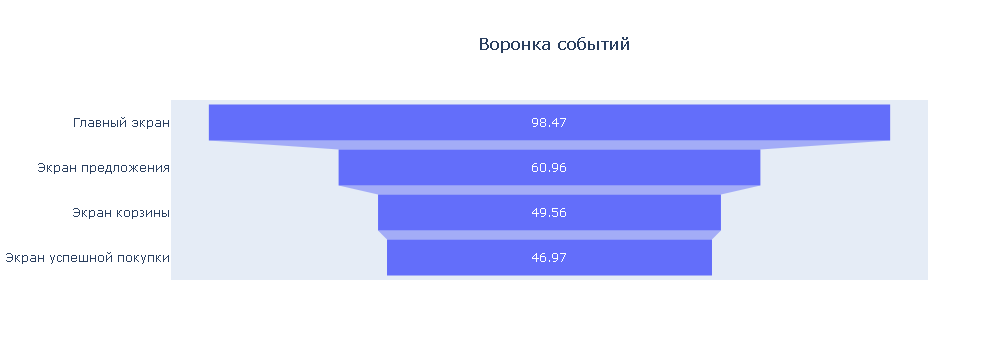

In [213]:

fig = go.Figure(
    go.Funnel(
        y=[
            'Главный экран',
            'Экран предложения',
            'Экран корзины',
            'Экран успешной покупки',
        ],
        x=df_v.loc[:4,'user_share_nunique'],
    )
)
fig.update_layout(title={'text' :'Воронка событий', 'x':0.55, 'xanchor': 'center'})

fig.show() 

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Доля пользователей, которые совершали каждое из этих событий посчитана правильно. 

    
Доля пользователей, которые проходят на следующий шаг воронки посчитана правильно.

Здорово, что данные визуализированы – построен график воронки.
    

Больше всего пользователей теряется на первом шаге Главный экран-Экран предложения.

In [214]:
col_paym = int(df_v[df_v['event_name']=='PaymentScreenSuccessful']['user_nunique'])
col_main = int(df_v[df_v['event_name']=='MainScreenAppear']['user_nunique'])            
print(f'Доля пользователей, прошедшая путь от первого события до последнего: {col_paym/col_main:.2%}')

Доля пользователей, прошедшая путь от первого события до последнего: 47.70%


C:\Users\Андрей.LAPTOP-NRKA66DP\AppData\Local\Temp\ipykernel_6616\2303284977.py:1: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\Андрей.LAPTOP-NRKA66DP\AppData\Local\Temp\ipykernel_6616\2303284977.py:2: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



Весь путь от просмотра главного экрана до экрана успешной покупки проходит чуть меньше половины пользователей - 47%.  
Больше всего пользователей теряется на первом шаге Главный экран-Экран предложения. 

Только 62% процента пользователей, зашедших на главный экран, потом переходят в раздел предложения.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Доля пользователей от первого события до оплаты посчитана верно.

Как ты думаешь, что нужно сделать, чтобы не было провала на шаге от MainScreenAppear к OffersScreenAppear ?
</div>


# Шаг 5.  Проверка результатов ксперимента

In [215]:
gr_df

,exp_id,user_id_count,user_id_nunique
0,246,79302,2484
1,247,77022,2513
2,248,84563,2537


В каждой экспериментальной группе примерно равное количество пользователей и событий.
    
    В группе 246 уникальных пользователей 2484, событий 79302
    В группе 247 уникальных пользователей 2513, событий 77022
    В группе 248 уникальных пользователей 2537, событий 84563


Для проверки эксперемента сравнивним доли пользователей, совершивших событие от общего количества пользователей в группе.  
Для сравнение долей применяем __z-тест__.

__Определение гипотез__  
Н0 нулевая гипотеза - нет разности между долями пользователей разных групп, соврешавших события.  
Н1 альтернативная гипотеза - есть статистически значимая разность между долями пользователей разных групп, соврешавших события. Новый дизайн способствовал росту продаж.

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b>

Скорректируй, пожалуйста, название гипотезы Н1, она называется альтернативная.
    
</div>


In [216]:
# Z-тест
def z_тест (successes, trials):  

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return p_value 

In [217]:
def z_test_proportions_ztest(successes, trials):

    # Генерируем две выборки данных (пример)
    # Например, результаты эксперимента: количество успехов в двух группах
    successes_group1 = successes[0]  # Количество успехов в первой группе
    total_group1 = trials[0]     # Общее количество испытаний в первой группе

    successes_group2 = successes[1]  # Количество успехов во второй группе
    total_group2 = trials[1]     # Общее количество испытаний во второй группе

    # Выполняем Z-тест для разности долей
    z_statistic, p_value = proportions_ztest([successes_group1, successes_group2], [total_group1, total_group2])

    return p_value 

In [218]:
def test_A_B(gr_1_s, gr_2_s, gr_1_t, gr_2_t, alpha = .05, met=True):
    p=[]
    for name_event in ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']:
        str_df = df_[df_['event_name']==name_event]

        successes = np.array([str_df[gr_1_s], str_df[gr_2_s]])
        trials = np.array([str_df[gr_1_t], str_df[gr_2_t]])

        if met:
            p_value = z_test_proportions_ztest(successes, trials)
        else:
            p_value = z_тест(successes, trials)

        if p_value < alpha:
            str_H = "Отвергаем Н0"
        else:
            str_H = "Не отвергаем Н0"       
            
        p.append([gr_1_s, gr_2_s, name_event, round(p_value[0], 4), str_H, alpha])
    
    return p      
    
        

In [219]:
# число уникальных пользователей по группам и событиям
df_ = (
    df.query('event_name != "Tutorial"')
    .groupby(['event_name', 'exp_id'], 
            as_index=False) 
            .agg(  
                   user_id_nunique = ('user_id', 'nunique'),  
                )
        ).pivot_table(index='event_name', columns='exp_id', values='user_id_nunique', aggfunc='sum').reset_index(
        ).sort_values(by='246', ascending=False)
df_['246_247'] = df_['246']+df_['247']

In [220]:
for index, row in gr_df.iterrows():
    df_['total_'+row['exp_id']+'_u'] = row['user_id_nunique']
    
df_['total_246_247_u'] = df_['total_246_u']+df_['total_247_u'] 

In [221]:
df_

exp_id,event_name,246,247,248,246_247,total_246_u,total_247_u,total_248_u,total_246_247_u
1,MainScreenAppear,2450,2476,2493,4926,2484,2513,2537,4997
2,OffersScreenAppear,1542,1520,1531,3062,2484,2513,2537,4997
0,CartScreenAppear,1266,1238,1230,2504,2484,2513,2537,4997
3,PaymentScreenSuccessful,1200,1158,1181,2358,2484,2513,2537,4997


Сформировал таблицу в разрезе событий и групп. Описание групп:

    246 – количество уникальных пользователей группы 246, совершивших данное событие
    247 – количество уникальных пользователей группы 247, совершивших данное событие
    248 – количество уникальных пользователей группы 248, совершившихданное событие
    246_247 – сумма уникальных пользователей групп 246 и 247, совершивших данное событие
    
    total_246_u – общее количество уникальных пользователей группы 246 	
    total_247_u – общее количество уникальных пользователей группы 247	
    total_248_u – общее количество уникальных пользователей группы 248	
    

In [222]:
test_df = pd.DataFrame(
    test_A_B('246', '247', 'total_246_u', 'total_247_u', 0.01), 
    columns=['group_1', 'group_2', 'event', 'p_value', 'H0', 'alpha'])
test_df

,group_1,group_2,event,p_value,H0,alpha
0,246,247,MainScreenAppear,0.7571,Не отвергаем Н0,0.01
1,246,247,OffersScreenAppear,0.2481,Не отвергаем Н0,0.01
2,246,247,CartScreenAppear,0.2288,Не отвергаем Н0,0.01
3,246,247,PaymentScreenSuccessful,0.1146,Не отвергаем Н0,0.01


Z-тест не показал статистической значимой разности в долях пользователе первой и второй группы по разным событиям. 

А/А тест прошел успешно, нулевая гипотеза не было опровергнута. Между группами нет разности.

In [223]:
test_df = pd.DataFrame(
    test_A_B('246', '248', 'total_246_u', 'total_248_u', 0.01), 
    columns=['group_1', 'group_2', 'event', 'p_value', 'H0', 'alpha'])
test_df

,group_1,group_2,event,p_value,H0,alpha
0,246,248,MainScreenAppear,0.2950,Не отвергаем Н0,0.01
1,246,248,OffersScreenAppear,0.2084,Не отвергаем Н0,0.01
2,246,248,CartScreenAppear,0.0784,Не отвергаем Н0,0.01
3,246,248,PaymentScreenSuccessful,0.2123,Не отвергаем Н0,0.01


В этом тесте Z-тест так же не показал статистической значимой разности в долях пользователе первой и третьей группы по разным событиям. 

А/В не опроверг нулевую гипотезу о статистически значимой разности между контрольной группой и экспериментальной. Между группами нет разности, новый дизайн приложения не повлиял на продажи.

In [224]:
test_df = pd.DataFrame(
    test_A_B('247', '248', 'total_247_u', 'total_248_u', 0.01), 
    columns=['group_1', 'group_2', 'event', 'p_value', 'H0', 'alpha'])
test_df

,group_1,group_2,event,p_value,H0,alpha
0,247,248,MainScreenAppear,0.4587,Не отвергаем Н0,0.01
1,247,248,OffersScreenAppear,0.9198,Не отвергаем Н0,0.01
2,247,248,CartScreenAppear,0.5786,Не отвергаем Н0,0.01
3,247,248,PaymentScreenSuccessful,0.7373,Не отвергаем Н0,0.01


In [225]:
test_df = pd.DataFrame(
    test_A_B('246_247', '248', 'total_246_247_u', 'total_248_u', 0.01), 
    columns=['group_1', 'group_2', 'event', 'p_value', 'H0', 'alpha'])
test_df

,group_1,group_2,event,p_value,H0,alpha
0,246_247,248,MainScreenAppear,0.2942,Не отвергаем Н0,0.01
1,246_247,248,OffersScreenAppear,0.4343,Не отвергаем Н0,0.01
2,246_247,248,CartScreenAppear,0.1818,Не отвергаем Н0,0.01
3,246_247,248,PaymentScreenSuccessful,0.6004,Не отвергаем Н0,0.01


Было выполнено в общем итого 12 экспериментов, четыре между группой 1 и 3, четыре между 2 и 3, и четыре между 1+2 и 3 группами. Все не опровергли нулевую гипотезу.

Изменим коэффициент статистической значимости с поправкой Бонферрони

In [226]:
alpha = 0.01/12

In [227]:
test_df = pd.DataFrame(
    test_A_B('246', '248', 'total_246_u', 'total_248_u', alpha), 
    columns=['group_1', 'group_2', 'event', 'p_value', 'H0', 'alpha'])
display(test_df)

test_df = pd.DataFrame(
    test_A_B('247', '248', 'total_247_u', 'total_248_u', alpha), 
    columns=['group_1', 'group_2', 'event', 'p_value', 'H0', 'alpha'])
display(test_df)

test_df = pd.DataFrame(
    test_A_B('246_247', '248', 'total_246_247_u', 'total_248_u', alpha), 
    columns=['group_1', 'group_2', 'event', 'p_value', 'H0', 'alpha'])
display(test_df)

,group_1,group_2,event,p_value,H0,alpha
0,246,248,MainScreenAppear,0.2950,Не отвергаем Н0,0.000833
1,246,248,OffersScreenAppear,0.2084,Не отвергаем Н0,0.000833
2,246,248,CartScreenAppear,0.0784,Не отвергаем Н0,0.000833
3,246,248,PaymentScreenSuccessful,0.2123,Не отвергаем Н0,0.000833


,group_1,group_2,event,p_value,H0,alpha
0,247,248,MainScreenAppear,0.4587,Не отвергаем Н0,0.000833
1,247,248,OffersScreenAppear,0.9198,Не отвергаем Н0,0.000833
2,247,248,CartScreenAppear,0.5786,Не отвергаем Н0,0.000833
3,247,248,PaymentScreenSuccessful,0.7373,Не отвергаем Н0,0.000833


,group_1,group_2,event,p_value,H0,alpha
0,246_247,248,MainScreenAppear,0.2942,Не отвергаем Н0,0.000833
1,246_247,248,OffersScreenAppear,0.4343,Не отвергаем Н0,0.000833
2,246_247,248,CartScreenAppear,0.1818,Не отвергаем Н0,0.000833
3,246_247,248,PaymentScreenSuccessful,0.6004,Не отвергаем Н0,0.000833


Как и в предыдущем случае все эксперименты не опровергли нулевую гипотезу.  

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Гипотезы проверены верно, молодец.
</div>


# Выводы


В ходе исследований было выявлено, что воронка событий содержит четыре шага, просмотр главного экрана, экрана предложения, заказа и успешной покупки. От главного экрана до экрана успешной покупки доходит только 46%. Наибольшая потеря происходит на первом шаге, только 60% пользователей с главного экрана переходят в раздел предложений.

Проверка влияния нового дизайна показала, что группы разбиты корректно, А/А тестирование не опровергло нулевой гипотезы. Для пользователей, совершивших события, в двух контрольных группах не имеют статистически значимого различия.  

А/В  тестирование между контрольными группами и тестовой группой так же не показало статистически значимых различий ни между группами по отдельности, ни между объединенной группой и тестовой.  
Поправкой Бонферрони для многогрупповых тестирований не изменила результата. Новый дизайн не внес изменений пользовательскую статистику.

Для тестирования использовался z-тест, в котором нулевая гипотеза звучала, как равенство долей пользователь разных групп, совершающих соответствующие события. Не нулевая гипотеза – между долями есть статистически значимая разность.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Хороший аналитический вывод, который можно предоставить менеджерам. Верно, изменение шрифтов никак не повлияло на поведение пользователей.

</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта и написаны качественные аналитические выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже ты найдешь интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

  
- скорректируй, пожалуйста, формулировку гипотезы Н1
- узнай, пожалуйста, много ли пользователей мы потеряли, отбросив старые данные
- добавь, пожалуйста, заголовок для графика и подписи осей на русском языке.
</div>
</div>




